In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [11]:
data = pd.read_csv('UFO.csv')
data.head()


/tmp/ipykernel_1981/4001531516.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('UFO.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [12]:
print(data.shape)

data[data['duration (seconds)'].astype(str).str.contains('`')]


(80332, 11)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
27822,2/2/2000 19:33,bouse,az,us,NaN,2`,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2/16/2000,33.9325000,-114.005000
35692,4/10/2005 22:52,santa cruz,ca,us,NaN,8`,eight seconds,2 red lights moving together and apart with a ...,4/16/2005,36.9741667,-122.029722
58591,7/21/2006 13:00,ibague (colombia),NaN,NaN,circle,0.5`,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,10/30/2006,4.440663,-75.244141


In [13]:
data = data.drop(index=27822)


In [14]:
data = data.drop(index=35692)


In [15]:
data = data.drop(index=58591)


In [16]:
data['duration (seconds)'] = data['duration (seconds)'].astype(float)


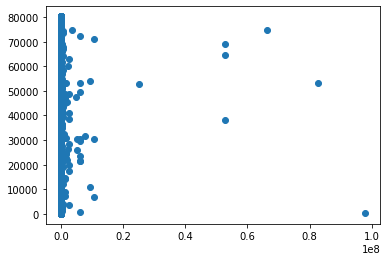

In [17]:
plt.scatter(data['duration (seconds)'], data.index)


(array([2.9597e+04, 7.9820e+03, 7.2020e+03, 8.6700e+03, 1.5330e+03,
        5.9900e+02, 6.4150e+03, 6.0000e+01, 3.1200e+02, 2.7000e+01,
        4.1000e+03, 6.0000e+01, 8.2000e+01, 3.0110e+03, 9.3000e+01,
        6.8000e+01, 4.7600e+02, 1.1000e+01, 2.3000e+01, 5.0000e+00,
        2.7520e+03, 1.2000e+01, 2.1000e+01, 1.8400e+02, 1.2000e+01,
        7.0000e+00, 4.1300e+02, 1.0000e+00, 1.2000e+01, 2.0000e+00,
        1.0450e+03, 4.0000e+00, 9.0000e+00, 8.5000e+01, 5.0000e+00,
        1.0000e+00, 2.3000e+01, 5.0000e+00, 2.0000e+00, 1.0000e+00,
        2.2090e+03, 2.0000e+00, 0.0000e+00, 1.0000e+01, 0.0000e+00,
        0.0000e+00, 2.8000e+01, 1.0000e+00, 2.0000e+00, 5.3000e+01]),
 array([   0.,   90.,  180.,  270.,  360.,  450.,  540.,  630.,  720.,
         810.,  900.,  990., 1080., 1170., 1260., 1350., 1440., 1530.,
        1620., 1710., 1800., 1890., 1980., 2070., 2160., 2250., 2340.,
        2430., 2520., 2610., 2700., 2790., 2880., 2970., 3060., 3150.,
        3240., 3330., 3420., 3510.

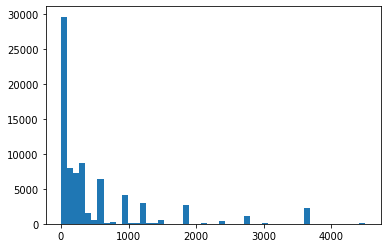

In [18]:
plt.hist(data['duration (seconds)'], range=[0,4500], bins=50)



In [19]:
def my_to_datetime(date_str):
    if '24:' in date_str:
        return date_str.replace('24:', '00:')
    else:
        return date_str


print(my_to_datetime('10/12/2003 24:00'))

10/12/2003 00:00


In [21]:
data['datetime'] = data.datetime.apply(my_to_datetime)

In [22]:
data['Month'] = pd.to_datetime(data['datetime']).dt.month
data['Year'] = pd.to_datetime(data['datetime']).dt.year
data['Hour'] = pd.to_datetime(data['datetime']).dt.hour

(array([ 4802.,  3210.,  2357.,  2004.,  1529.,  1591.,  1224.,   905.,
          803.,   958.,  1166.,  1144.,  1368.,  1302.,  1322.,  1433.,
         1620.,  2592.,  4002.,  6146.,  8617., 11445., 10836.,  7953.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

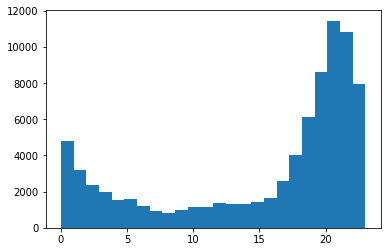

In [27]:
plt.hist(data['Hour'], bins = 24)


In [24]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Year,Hour
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,1949,20
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,10,1949,21
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,10,1955,17
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,1956,21
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,1960,20


• How long do UFO sightings last?
They last about 0-90 seconds 
 
 What time of day do most sightings happen?
8
Do UFO sighting happen more often in the night time or the day time?
Night time 

